In [ ]:
# importing all the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# fetching the excel file in pandas dataframe
df=pd.read_excel("/content/Copy of loan.xlsx")

In [ ]:
# checking the primery info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# describing the dataframe
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# droping unnecessary features from the dataframe
df=df.drop(['Loan_ID',"Gender","Married","Self_Employed"],axis=1)

In [ ]:
# converting the obejct type data into numerical data using get_dummies

df['Education']=pd.get_dummies(df['Education'],drop_first=True)
df['Loan_Status']=pd.get_dummies(df['Loan_Status'],drop_first=True)
b=pd.get_dummies(df['Property_Area'],drop_first=True)

In [ ]:
# joining the converted feature to the original dataset
new_df=df.join(b)


In [ ]:
# droping duplicate column and checking first 10 rows of df
new_df=new_df.drop('Property_Area',axis=1)
new_df.head(10)

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,0,0,5849,0.0,NaN,360.0,1.0,1,0,1
1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,0,0,3000,0.0,66.0,360.0,1.0,1,0,1
3,0,1,2583,2358.0,120.0,360.0,1.0,1,0,1
4,0,0,6000,0.0,141.0,360.0,1.0,1,0,1
5,2,0,5417,4196.0,267.0,360.0,1.0,1,0,1
6,0,1,2333,1516.0,95.0,360.0,1.0,1,0,1
7,3+,0,3036,2504.0,158.0,360.0,0.0,0,1,0
8,2,0,4006,1526.0,168.0,360.0,1.0,1,0,1
9,1,0,12841,10968.0,349.0,360.0,1.0,0,1,0


In [ ]:
# checking the total number of null values in the dataset per feature
new_df.isna().sum()

Dependents           15
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
Semiurban             0
Urban                 0
dtype: int64

In [ ]:
# converting the specific odd value to the appropriate value
new_df['Dependents'].replace('3+',4,inplace=True)

In [ ]:
# filling the null value in the dependents feature
new_df['Dependents']=new_df['Dependents'].fillna(0)

In [ ]:
# checking for the null values in the Dependents feature
new_df['Dependents'].isna().any()

False

In [ ]:
# typecasting the column from float to the int
new_df['Dependents'].astype(int)

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    4
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int64

In [ ]:
# filling the null values in the column
new_df['Loan_Amount_Term']=new_df['Loan_Amount_Term'].fillna(new_df['Loan_Amount_Term'].mode())

In [ ]:
# filling the null values in the column
new_df['Credit_History']=new_df['Credit_History'].fillna(new_df['Credit_History'].mode())

In [ ]:
# filling the null values in the column
new_df['LoanAmount']=new_df['LoanAmount'].fillna(new_df['LoanAmount'].mean())

In [ ]:
# filling the null values in the column
new_df['Credit_History']=new_df['Credit_History'].fillna(1)

In [ ]:
# typecasting the column from float to the int
new_df['Credit_History'].astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Credit_History, Length: 614, dtype: int64

In [ ]:
# checking the type of the feature
type(new_df.loc[1,'Credit_History'])

numpy.float64

In [ ]:
# filling the null values in the column
new_df['Loan_Amount_Term'].fillna(0,inplace=True)


In [137]:
# checking for the null values in the Dependents feature
new_df.isna().sum()

Dependents           0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
Semiurban            0
Urban                0
dtype: int64

In [ ]:
# creating the object of Standerd Scaler
sc=StandardScaler()

In [ ]:
# scaling the column
new_df['LoanAmount']=sc.fit_transform(new_df[['LoanAmount']])

In [ ]:
# scaling the column
new_df['CoapplicantIncome']=sc.fit_transform(new_df[['CoapplicantIncome']])

In [ ]:
# scaling the column
new_df['ApplicantIncome']=sc.fit_transform(new_df[['ApplicantIncome']])

In [ ]:
# typecasting manually
for i in range(new_df.shape[0]):
  new_df.loc[i,'Loan_Amount_Term']=int(new_df.loc[i,'Loan_Amount_Term'])

In [ ]:
# scaling the column
new_df['Loan_Amount_Term']=sc.fit_transform(new_df[['Loan_Amount_Term']])

In [ ]:
# Spliting into the X,Y
x=new_df.drop('Loan_Status',axis=1)
y=new_df['Loan_Status']

In [ ]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2023)

In [ ]:
# creating the object of the logistic regression
lr=LogisticRegression(random_state=2023)

In [ ]:
# checking the null values in the X_Train
x_train.isna().any()

Dependents           False
Education            False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Semiurban            False
Urban                False
dtype: bool

In [ ]:
# fitting the object
x=lr.fit(x_train,y_train)

In [ ]:
# Predicting the value
predicted=x.predict(x_test)

In [ ]:
# checking for the accuracy of the model
x.score(x_test,y_test)*100

79.67479674796748

In [ ]:
# checking the confusion matrix
cm=confusion_matrix(y_test,predicted)

In [ ]:
# checking the actual values in the confusion matrix
cm

array([[13, 25],
       [ 0, 85]])

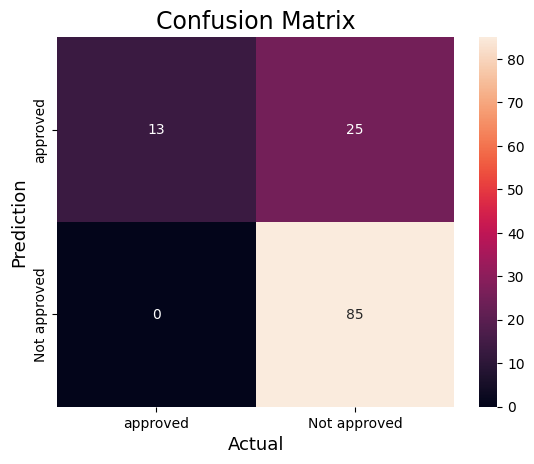

In [ ]:
# plotting the confusion matrix visualization using heatmap in the seaborn library
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['approved','Not approved'],yticklabels=['approved','Not approved'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()